# Демо блокнот к Лекции №1. Знакомство со средствами обработки табличных данных языка Python

В этом демо-блокноте мы познакомимся с основными библиотеками для работы с векторными и табличными данными -- Numpy и Pandas.

## Numpy 

Практически любая современная задача машинного обучения и анализа данных в конечном счёте сводится к работе с векторами чисел. Даже если на входе у нас есть изображения, тексты или аудиозаписи — всё это в процессе предобработки превращается в числовые признаки, которые можно представить в виде многомерных векторов.

В отличие от питоновских списков (```list```), которые могут хранить объекты любого типа и обладают большой гибкостью, массивы ```numpy``` предназначены специально для работы с числовыми данными и оптимизированы для векторных вычислений.

Как только вы пытаетесь выполнять числовые расчёты над *большими* списками, питон быстро напоминает о своём интерпретируемом характере. Операции со списками, особенно с использованием циклов for, становятся медленными и неэффективными, что особенно критично в задачах анализа данных или машинного обучения.

NumPy решает эту проблему за счёт введения однородных массивов фиксированного типа данных, которые называются ```ndarray``` (N-dimensional array). Они создаются таким образом, чтобы операции над ними выполнялись максимально эффективно за счёт векторизации и обращения к оптимизированным библиотекам, написанным на C.

Ключевые особенности ``numpy.ndarray``:
- все элементы массива хранятся в памяти компактно, в одном блоке;
- операции с массивами реализованы на уровне компилируемого кода, что даёт значительный выигрыш в скорости по сравнению со стандартными списками Python;
- доступно огромное количество оптимизированных функций для работы с векторами и матрицами: от простых арифметических операций до линейной алгебры, статистики и трансформаций.

На практике это означает, что задачи, которые в чистом Python потребовали бы медленных циклов и множества строк кода, в ```numpy``` решаются в одну строку и в разы быстрее.

Если вы запускаете этот блокнот в Yandex Datasphere, то у вас нет необходимости [самим устанавливать эту библиотеку](https://numpy.org/install/) и вам остается только сделать её импорт:

In [1]:
import numpy as np

### Создание массива

#### Из готового списка

In [2]:
a = np.array([0, 1, 2, 3, 4, 5])
a

array([0, 1, 2, 3, 4, 5])

#### С нуля с любым фиксированным значением

In [6]:
np.zeros((2, 4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [7]:
np.ones(9)

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [10]:
np.full((5, 5), 9)

array([[9, 9, 9, 9, 9],
       [9, 9, 9, 9, 9],
       [9, 9, 9, 9, 9],
       [9, 9, 9, 9, 9],
       [9, 9, 9, 9, 9]])

**Когда это может понадобиться?**

- для создания маски при вычислениях
- инициализировать весы сети
- создать пустой массив, чтобы затем заполнить его специальным образом

#### Генерация по диапазону

Часто в задачах анализа данных мы хотим сгенерировать числовую последовательность с шагом или разбивкой по диапазону.

- ``np.arange(start, stop, step)`` — аналог функции range(), но работает с вещественными числами.
- ``np.linspace(start, stop, num)`` — разбивает интервал на равные части.

In [12]:
np.arange(0, 10, 2) 

array([0, 2, 4, 6, 8])

In [ ]:
np.linspace(0, 1, 5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

**Когда это может быть нужно?**

- генерация синтетических данных
- работа с временными рядами
- создание координатных сеток

#### Генерация случайного массива

``numpy`` предлагает большой набор генераторов случайных чисел через модуль ``np.random``

Основные функции:
- ``np.random.rand(shape)`` — случайные числа от 0 до 1 из равномерного распределения;
- `np.random.randn(shape)` — случайные числа из стандартного нормального распределения (среднее 0, дисперсия 1);
- `np.random.randint(low, high, size)` — случайные целые числа в заданном диапазоне.

In [16]:
np.random.rand(3, 2)  

array([[0.43296643, 0.33044409],
       [0.85300287, 0.27862206],
       [0.69229525, 0.15248531]])

In [17]:
np.random.randn(4)    

array([-1.45968548, -0.26999446,  1.955533  , -0.33599414])

In [18]:
np.random.randint(0, 10, 5) 

array([3, 5, 0, 0, 7], dtype=int32)

**Когда это стоит использовать?**
Когда известно, что размерность массива должна совпадать с уже имеющимся — например, при создании масок, накоплении данных по батчам или создании новых признаков.

#### Копирование структуры другого массива

Иногда нужно создать новый массив той же формы, что и существующий, но с другими значениями. Для этого есть специальные функции:

- `np.empty_like(existing_array)` — массив такой же формы, не инициализированный (мусорные значения);
- `np.zeros_like(existing_array)` — массив той же формы, заполненный нулями;
- `np.ones_like(existing_array)` — аналогично с единицами.

In [19]:
a = np.array([[1, 2, 3], [4, 5, 6]])
a

array([[1, 2, 3],
       [4, 5, 6]])

In [20]:
np.zeros_like(a)

array([[0, 0, 0],
       [0, 0, 0]])

### Доступ к элементам массива

Одномерные массивы можно индексированы также, как мы это делаем с питоновскими списками.

In [21]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [22]:
a[4]

np.int64(4)

In [23]:
a[2:5]

array([2, 3, 4])

In [24]:
a[:6:2] = 1000

In [25]:
a[::-1]

array([   9,    8,    7,    6,    5, 1000,    3, 1000,    1, 1000])

In [26]:
for i in a:
    print(i **2)

1000000
1
1000000
9
1000000
25
36
49
64
81


Многомерные массивы могут иметь по одному индексу на ось. Эти индексы задаются в виде кортежа, разделенного запятыми:

In [ ]:
b = np.random.randint(0, 10, (3, 4)) # массив 3x4 из случайных чисел от 0 до 10 
b

array([[7, 9, 8, 0],
       [6, 8, 5, 0],
       [7, 3, 5, 2]], dtype=int32)

In [33]:
b[0, 1]

np.int32(9)

In [34]:
b[0:5, 1]

array([9, 8, 3], dtype=int32)

In [ ]:
b[:, 1] 

In [ ]:
b[1:3, :]

In [ ]:
b[-1] 

Выражение в скобках в b[i] рассматривается как i, за которым следует столько экземпляров :, сколько необходимо для представления остальных осей. NumPy также позволяет записать это выражение с помощью точек как b[i, ...]. Точки (...) представляют столько двоеточий, сколько необходимо для создания полного кортежа индексации. Например, если x - массив с 5 осями, то: 
- `x[1, 2, ...]` эквивалетно ` x[1, 2, :, :, :]`,
- `x[..., 3]` эквивалентна `x[:, :, :, :, 3]` и
- `x[4, ..., 5, :]` эквивалентна `x[4, :, :, 5, :]`.

### Копирование массива и вид (view) его представления 

Массив numpy - это структура данных, состоящая из двух частей: линейного, "непрерывного" буфера данных в оперативной памяти и метаданных, содержащих информацию о буфере.

Метаданные включают в себя тип данных, страйд и другую важную информацию, которая помогает легко манипулировать массивом. 


**View** — это представление того же буфера, блока данных, но с другими метаданными (размер, страйд, тип и т.д.). При изменении view меняются и оригинальные данные 


In [35]:
x = np.arange(10)
y = x[2:5]       
y[:] = 100     


x

array([  0,   1, 100, 100, 100,   5,   6,   7,   8,   9])

Copy создает полноценную копию данных — новый блок памяти, независимый от исходныго.

In [36]:
x = np.arange(10)
y = x.copy()    
y[0] = -1


x, y

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([-1,  1,  2,  3,  4,  5,  6,  7,  8,  9]))

NumPy предоставляет удобное свойство .base и флаг `.flags['OWNDATA']`:

- Если `arr.base` is None, то `arr` владеет данными — это скорее всего копия.
- Если `arr.base` is not None, то `arr` — view, указывает на оригинал.

In [ ]:
x = np.arange(9)
y = x.reshape((3,3))
z = x[[2, 4]]

y.base is None, z.base is None

(False, True)

### Изменение формы массива

Когда вы работаете с многомерными массивами, часто нужно изменить их форму — сделать из строки столбец, из матрицы вектор или наоборот. NumPy имеет разные функции, решающие такую задачу

#### reshape()

gозволяет реорганизовать массив, сохраняя тот же объём

In [ ]:
x = np.arange(12)          
y = x.reshape((3, 4))

y, y.base is x

(array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]),
 True)

In [45]:
w = x.reshape((7, 8))

ValueError: cannot reshape array of size 9 into shape (7,8)

#### flatten, ravel, reshape(-1)

- `flatten()` — всегда копирует данные в плоский (1D) массив
- `ravel()` — view, если возможно; иначе — копия
- `reshape(-1)` — аналогично ravel(), но гарантирует view даже если память не непрерывна

In [ ]:
a = np.arange(6).reshape(2,3)

f = a.flatten()
r = a.ravel()
v = a.reshape(-1)

print(f.base is None)      # True — копия
print(r.base is a)         # True — view
print(v.base is a)         # True — view


### Математические операции над массивами

#### Элементарные арифметические операции

NumPy позволяет выполнять векторные операции, аналогичные скалярным, но без Python-циклов

In [ ]:
a = np.array([1,2,3])
b = np.array([4,5,6])

print(a + b)   # [5,7,9]
print(a * b)   # [4,10,18]
print(a - b)   # [-3,-3,-3]
print(b / a)   # [4.,2.5,2.]
print(a ** 2)  # [1,4,9]

[5 7 9]
[ 4 10 18]
[-3 -3 -3]
[4.  2.5 2. ]
[1 4 9]


True

In [47]:
z = a + b
z.base is None # True, z — копия

True

#### Булевы операции

In [48]:
mask = b > 5       # [False, False, True]    # отбор элементов по условию

In [49]:
mask

array([False, False,  True])

In [50]:
a[mask]

array([3])

#### Операции линейной алгебры

- a @ b или np.matmul(a, b) — матричное умножение
- np.dot(a, b) — скалярное, векторное или матричное умножение.

In [ ]:
M = np.array([[1,2],[3,4]])
v = np.array([5,6])

print(M @ v)           # [17,39]
print(np.dot(M, M))    # [[7,10],[15,22]]


#### Агрегационные функции над осями массива

In [52]:
X = np.arange(12).reshape(3,4)
X


array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [53]:
print(X.sum(axis=0))    # по столбцам
print(X.mean(axis=1))   # по строкам
print(X.max(), X.min())

[12 15 18 21]
[1.5 5.5 9.5]
11 0


## Pandas

Если `numpy` — это универсальный инструмент для работы с векторами и многомерными массивами чисел, то `pandas` является специализированным инструментом для работы с табличными данными.

В реальных проектах по анализу данных большинство данных имеет табличную вид в различных форматах(.csv, .parquet, .xlsx, SQL БД,  и т.п.), источников которых может быть буквально что угодно:

- результаты измерений;
- логи действий пользователей;
- финансовые отчёты;
- анкетные данные
- еще тысяча, миллион вариантов

Все эти данные удобно анализировать в виде таблиц с именованными колонками и индексами строк. Именно для этого был создан `pandas`.

In [56]:
import pandas as pd

### Основные структуры данных: `Series` и `DataFrame`

In [57]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

- `index` — метки строк (в данном случае даты).
- `columns` — метки столбцов (A, B, C, D).
- каждая колонка — это Series.

In [58]:
dates = pd.date_range("20130101", periods=6)
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df.head()


,A,B,C,D
2013-01-01,-0.794489,1.375534,-1.013184,0.645473
2013-01-02,1.469924,-0.228927,-1.631875,-0.987890
2013-01-03,-1.889706,1.117702,1.716975,-0.306159
2013-01-04,0.832507,-0.227694,-0.381189,0.451840
2013-01-05,0.710071,-1.728864,-1.419511,1.087412


Датафрейм поддерживает смешанные типы в разных колонках: числа, даты, категориальные, строки.

In [59]:
df2 = pd.DataFrame({
    "A": 1.0,
    "B": pd.Timestamp("20130102"),
    "C": pd.Series(1, index=list(range(4)), dtype="float32"),
    "D": np.array([3] * 4, dtype="int32"),
    "E": pd.Categorical(["test", "train", "test", "train"]),
    "F": "foo"
})
df2


,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


### Первичный анализ данных

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2013-01-01 to 2013-01-06
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       6 non-null      float64
 1   B       6 non-null      float64
 2   C       6 non-null      float64
 3   D       6 non-null      float64
dtypes: float64(4)
memory usage: 240.0 bytes


In [61]:
df.describe(include="all")

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.210927,-0.235841,-0.644537,0.230454
std,1.278409,1.331831,1.232992,0.747847
min,-1.889706,-1.728864,-1.631875,-0.987890
25%,-0.418349,-1.349327,-1.349242,-0.116659
50%,0.771289,-0.228311,-1.075810,0.471944
75%,0.911068,0.781353,-0.539188,0.607117
max,1.469924,1.375534,1.716975,1.087412


In [62]:
df.head()

,A,B,C,D
2013-01-01,-0.794489,1.375534,-1.013184,0.645473
2013-01-02,1.469924,-0.228927,-1.631875,-0.987890
2013-01-03,-1.889706,1.117702,1.716975,-0.306159
2013-01-04,0.832507,-0.227694,-0.381189,0.451840
2013-01-05,0.710071,-1.728864,-1.419511,1.087412


In [63]:
df.tail()

,A,B,C,D
2013-01-02,1.469924,-0.228927,-1.631875,-0.987890
2013-01-03,-1.889706,1.117702,1.716975,-0.306159
2013-01-04,0.832507,-0.227694,-0.381189,0.451840
2013-01-05,0.710071,-1.728864,-1.419511,1.087412
2013-01-06,0.937255,-1.722794,-1.138437,0.492048


### Индексация и выборка

In [ ]:
df["A"], df[["A", "B"]]

In [ ]:
df.loc["2013-01-02":"2013-01-04", ["A", "B"]]


In [ ]:
df.iloc[1:4, 0:2]

In [ ]:
mask = (df["A"] > 0) & (df["B"] < 0)
df[mask]

In [ ]:
df.query("A > 0 and B < 0")

### Операции над даннымии

In [ ]:
df2 = df + df.iloc[0]
df.mean(axis=0), df.mean(axis=1)

In [ ]:
df.dropna()
df.fillna(0)
df.isna().sum()

In [ ]:
df["Category"] = ["X", "Y"] * 3

df.groupby("Category").mean()

In [ ]:
pd.concat([df, df2])

In [ ]:
pd.merge(df.reset_index(), df2.reset_index(), on="index", how="inner")

<Axes: >

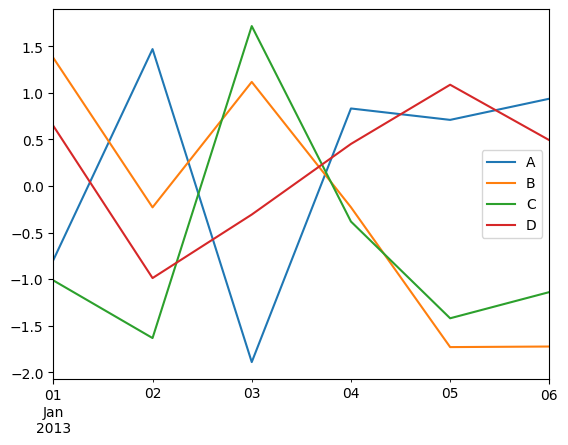

In [ ]:
import matplotlib.pyplot as plt

df.plot()

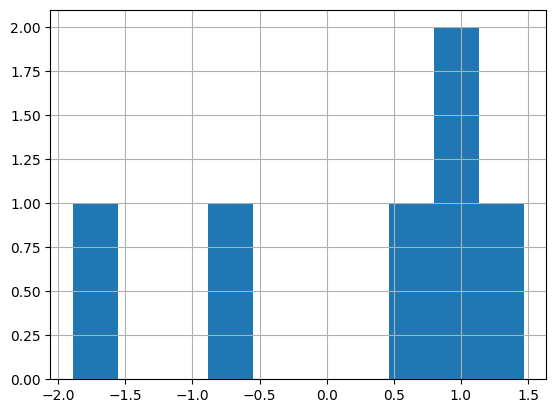

In [65]:
df["A"].hist()
plt.show()